In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_to_drop =[]

df_train = pd.read_csv('/kaggle/input/synthetic-vietnamese-students-feedback-corpus/synthetic_train.csv').drop(columns=col_to_drop).dropna()
df_test = pd.read_csv('/kaggle/input/synthetic-vietnamese-students-feedback-corpus/synthetic_val.csv').drop(columns=col_to_drop).dropna()

#df_train = convert(df_train)
#df_test = convert(df_test)

df_train.columns

Index(['sentence', 'sentiment', 'topic'], dtype='object')

In [3]:
df_train

,sentence,sentiment,topic
0,Đội ngũ bảo trì quá thưa thớt dẫn đến không đả...,negative,facility
1,The university's musical and artistic faciliti...,neutral,facility
2,Phương pháp giảng dạy phù hợp với các đối tượn...,neutral,curriculum
3,Chương trình học giúp tôi trở thành một chuyên...,positive,curriculum
4,Tôi nghĩ rằng chương trình đào tạo có thể có t...,neutral,curriculum
...,...,...,...
8139,Hệ thống an ninh trong trường rất tốt và đảm b...,neutral,facility
8140,Cô giáo đã giúp tôi hiểu rõ hơn về môn học này.,neutral,others
8141,Anh/chị đã trở thành một người bạn đồng hành v...,positive,others
8142,Chương trình học phù hợp với nhu cầu của các n...,neutral,curriculum


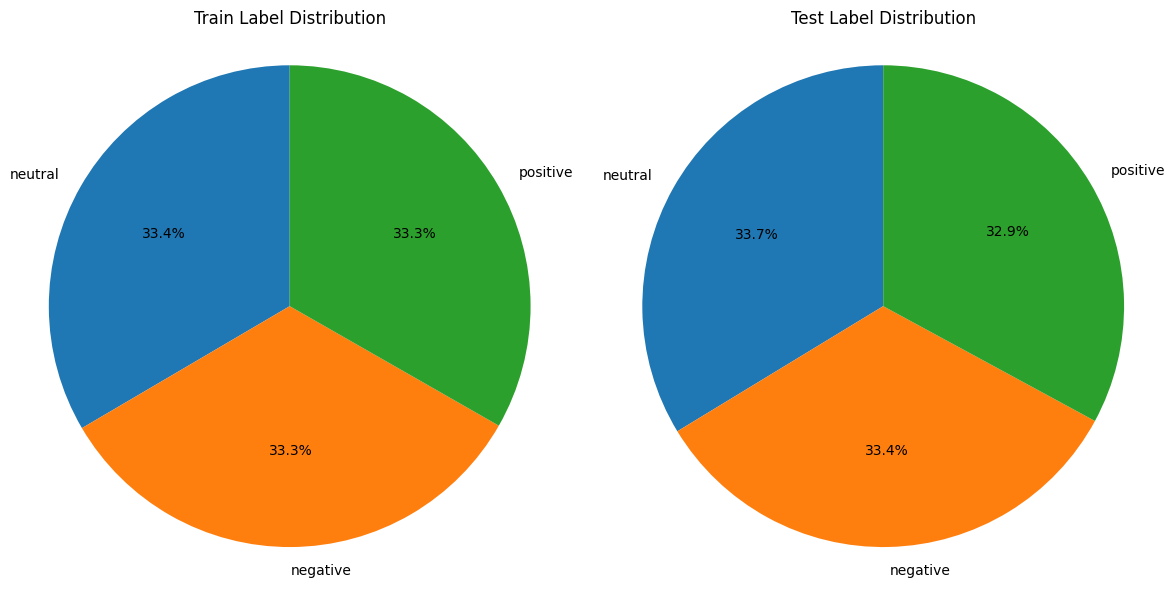

In [4]:
train_counts = df_train['sentiment'].value_counts()
test_counts = df_test['sentiment'].value_counts()

# Labels (giả định là giống nhau trong cả hai tập)
labels = train_counts.index

# Tạo subplot với 2 biểu đồ tròn
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart cho train
axes[0].pie(train_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Train Label Distribution')
axes[0].axis('equal')

# Pie chart cho test
axes[1].pie(test_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Test Label Distribution')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

In [5]:
pip install underthesea torch 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-

In [6]:
from transformers import AutoTokenizer, AutoModel
from underthesea import word_tokenize
from tqdm import tqdm
import torch

# Load tokenizer và model (PhoBERT tiền huấn luyện cho phân loại)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)
phobert = AutoModel.from_pretrained("vinai/phobert-base")

def get_phobert_embedding(text, tokenizer, model):
    # Tokenize với underthesea (PhoBERT yêu cầu tách từ tiếng Việt)
    tokenized = word_tokenize(text, format="text")

    # Encode text
    inputs = tokenizer(tokenized, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)

    # Lấy embedding từ CLS token (đầu tiên)
    cls_embedding = outputs.last_hidden_state[:, 0, :]  # shape: [1, 768]
    return cls_embedding.squeeze().numpy()  # Chuyển thành 1D numpy array

config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

2025-05-03 15:06:12.314421: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746284772.491345      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746284772.546033      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

In [7]:
embeddings = []

for text in tqdm(df_train['sentence'], desc="Embedding text"):
    emb = get_phobert_embedding(text, tokenizer, phobert)
    embeddings.append(emb)

# Gán vào DataFrameDataFramez
df_train['Embedding'] = embeddings

Embedding text:   0%|          | 1/8144 [00:00<38:56,  3.49it/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Embedding text: 100%|██████████| 8144/8144 [08:34<00:00, 15.84it/s]


In [8]:
embeddings = []

for text in tqdm(df_test['sentence'], desc="Embedding text"):
    emb = get_phobert_embedding(text, tokenizer, phobert)
    embeddings.append(emb)

# Gán vào DataFrameDataFramez
df_test['Embedding'] = embeddings

Embedding text: 100%|██████████| 2036/2036 [02:09<00:00, 15.78it/s]


In [9]:
df_train.to_csv('synthetic_train.csv', index=False, encoding="utf-8-sig")
df_test.to_csv('synthetic_val.csv', index=False, encoding="utf-8-sig")

In [10]:
df_train

,sentence,sentiment,topic,Embedding
0,Đội ngũ bảo trì quá thưa thớt dẫn đến không đả...,negative,facility,"[0.21998207, 0.3635176, -0.46106467, -0.881800..."
1,The university's musical and artistic faciliti...,neutral,facility,"[-0.06985562, 0.3133161, -0.64190197, -0.44401..."
2,Phương pháp giảng dạy phù hợp với các đối tượn...,neutral,curriculum,"[0.036697455, -0.16225493, -0.48026925, -1.026..."
3,Chương trình học giúp tôi trở thành một chuyên...,positive,curriculum,"[0.23063682, 0.21073496, -0.45500314, -1.02824..."
4,Tôi nghĩ rằng chương trình đào tạo có thể có t...,neutral,curriculum,"[0.2794389, 0.36575818, -0.71562105, -0.706007..."
...,...,...,...,...
8139,Hệ thống an ninh trong trường rất tốt và đảm b...,neutral,facility,"[0.13017406, 0.25345495, -0.32259738, -0.80290..."
8140,Cô giáo đã giúp tôi hiểu rõ hơn về môn học này.,neutral,others,"[0.3466207, -0.13210966, -0.4936723, -0.801261..."
8141,Anh/chị đã trở thành một người bạn đồng hành v...,positive,others,"[0.26729694, -0.014959947, -0.5563365, -0.6826..."
8142,Chương trình học phù hợp với nhu cầu của các n...,neutral,curriculum,"[-0.11341993, 0.26775843, -0.2570663, -0.95438..."


In [11]:
df_test

,sentence,sentiment,topic,Embedding
0,Chất lượng vật chất kém.,negative,facility,"[0.029605858, 0.3457523, -0.18893106, -0.95425..."
1,"Phần mềm học tập quá khó sử dụng, khiến sinh v...",negative,facility,"[-0.10240999, 0.036388543, -0.35073307, -0.778..."
2,Trường tôi thiếu những tiện ích cơ bản như máy...,negative,facility,"[0.10486992, 0.46137106, -0.453653, -0.4811368..."
3,Cần tạo thêm các hoạt động gắn kết giữa sinh v...,neutral,curriculum,"[0.25334904, 0.19779268, -0.31709164, -0.86658..."
4,Họ rất khoan dung và lượng giác trong quan điể...,neutral,others,"[0.014985751, 0.4033313, -0.34071678, -0.66590..."
...,...,...,...,...
2031,Giáo viên đưa ra các phương tiện hỗ trợ giảng ...,neutral,curriculum,"[0.03377759, 0.109253936, -0.28329962, -0.8293..."
2032,The university's computer facilities are up-to...,neutral,facility,"[0.08987775, 0.1337287, -0.8044881, -0.6825294..."
2033,Thiếu tính linh hoạt trong hình thức giảng dạy...,negative,curriculum,"[0.13794698, 0.014209354, -0.5129679, -0.84867..."
2034,Cô ấy rất sắc sảo và có khả năng phân tích chi...,positive,others,"[0.17864096, 0.11692939, -0.32153398, -0.75609..."
